In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
img = cv2.imread('../images/whites/no-white.png')

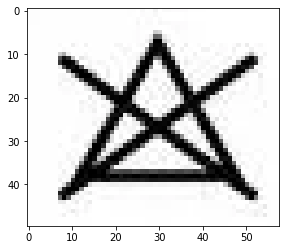

In [3]:
plt.imshow(img)

In [30]:
def make_masking_noise_data(data_x,percent=0.8):
    size = data_x.shape
    masking = np.random.binomial(n=1, p=percent,size=size)
    return data_x*masking

In [31]:
def make_gaussian_noise_data(data_x, scale=0.9):
    gaussian_data_x = data_x + np.random.normal(loc=0, scale=scale, size=data_x.shape)
    gaussian_data_x = np.clip(gaussian_data_x, 0, 1)
    return gaussian_data_x

In [58]:
def addSaltPepperNoise(src,amount):
    row,col,ch = src.shape
    s_vs_p = 0.5
#    amount = 0.04
    out = src.copy()
    # Salt mode
    num_salt = np.ceil(amount * src.size * s_vs_p)
    coords = [np.random.randint(0, i-1 , int(num_salt))
                 for i in src.shape]
    out[coords[:-1]] = (255,255,255)

    # Pepper mode
    num_pepper = np.ceil(amount* src.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i-1 , int(num_pepper))
             for i in src.shape]
    out[coords[:-1]] = (0,0,0)
    return out

/Users/kawamura/Desktop/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/Users/kawamura/Desktop/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


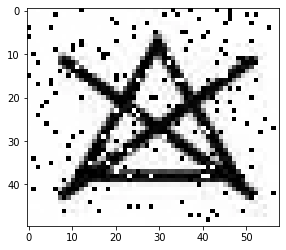

In [89]:
for i in range(20):
    amount = i * 0.002
    noise_salt = addSaltPepperNoise(img, amount)
    plt.imshow(noise_salt)
    save_img = cv2.cvtColor(noise_salt, cv2.COLOR_RGB2BGR)
    cv2.imwrite(f'../images/whites/noise{str(amount)}.png', save_img)

True

In [77]:
noise_gauss =  make_gaussian_noise_data(img)

In [78]:
noise_masked = make_masking_noise_data(img)

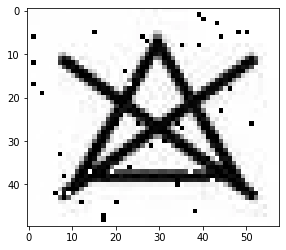

In [79]:
plt.imshow(noise_salt)

In [63]:
save_img = cv2.cvtColor(noise_salt, cv2.COLOR_RGB2BGR)
cv2.imwrite('../images/white.jpg', save_img)

True